In [1]:
import sys
sys.path.append('components')

from components.data_loader import *
from components.models import *
from components.model_trainer import *
from utils import *

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
import warnings
import time

# **Denoiser AutoEncoder**

### **Data loading**

In [2]:
train = AutoEncoderDataset(type_data="train")
val = AutoEncoderDataset(type_data="val")
test = AutoEncoderDataset(type_data="test")

train_loader = DataLoader(train, batch_size=100, shuffle=True)
val_loader = DataLoader(val, batch_size=100, shuffle=True)
test_loader = DataLoader(test, batch_size=100, shuffle=True)

### **Hyperparameters**

In [3]:
autoencoder = AutoEncoder()
if os.path.exists("training_artifacts/AutoEncoder_best.pth"):
    autoencoder.load_state_dict(torch.load("training_artifacts/AutoEncoder_best.pth"))
autoencoder_optimizer = optim.Adam(autoencoder.parameters(), lr=0.001)

training_parameters = {
    "model": autoencoder,
    "train_loader": train_loader,
    "val_loader": val_loader,
    "criterion": nn.MSELoss(),
    "optimizer": autoencoder_optimizer,
    "lr_scheduler": optim.lr_scheduler.ReduceLROnPlateau(autoencoder_optimizer, mode='min', factor=0.1, patience=3, min_lr=0.000001),
    "device": "cuda" if torch.cuda.is_available() else "cpu",
}

### **Training**

In [4]:
# Really long training process - I ran it during the night
import time
import warnings

# Should train for more epochs - I reused the weights from the previous training
EPOCHS = 5

with warnings.catch_warnings():
    warnings.simplefilter("ignore")

    autoencoder_trainer = ModelTrainer(**training_parameters)
    
    start = time.time()
    autoencoder_trainer.fit(EPOCHS)
    end = time.time()
    
    training_time_hours = (end - start) / 3600
    print(f"Training took {training_time_hours:.2f} hours")


Epoch 1/5
------------------------------
Training Loss: 0.0379
Validation Loss: 0.0286
Model saved with improved validation loss: 0.0286

Epoch 2/5
------------------------------


### **Visualisations and feedback on training**

##### A closer look on training loss 

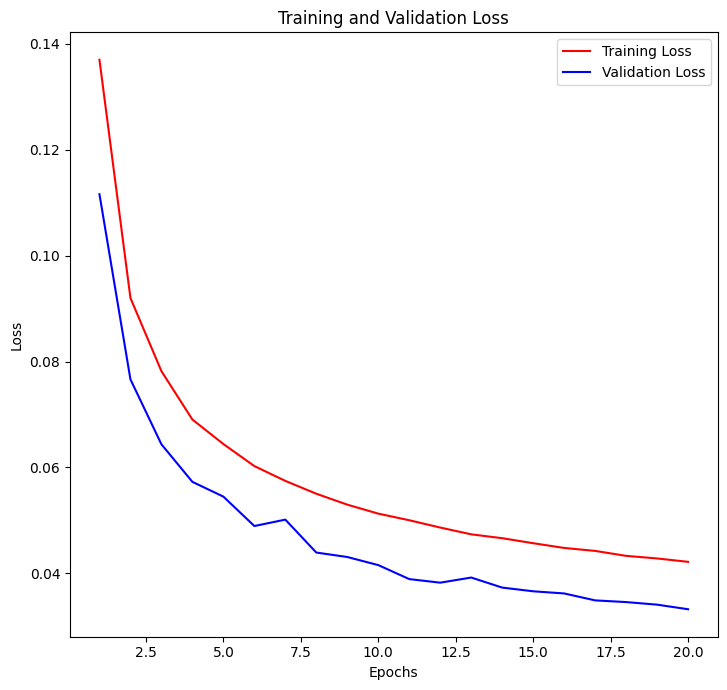

In [ ]:
autoencoder_trainer.plot_training_history()

##### A simple visualisation to see a few example of the reconstruction

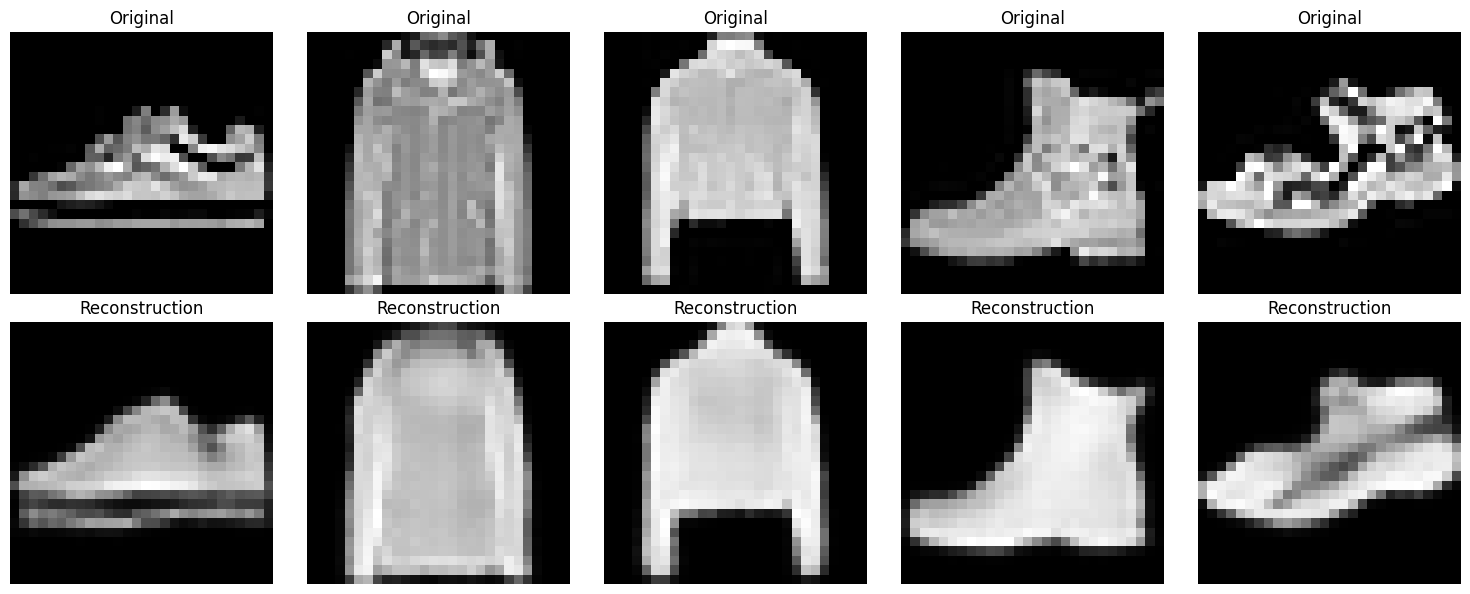

In [ ]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    visualise_reconstruction(autoencoder, test_loader)

-----------------------------
-----------------------------

# **Classifier**

### **Data Loading**

In [ ]:
train = ClassifierDataset(type_data="train")
val = ClassifierDataset(type_data="val")
test = ClassifierDataset(type_data="test")

train_loader = DataLoader(train, batch_size=100, shuffle=True)
val_loader = DataLoader(val, batch_size=100, shuffle=True)
test_loader = DataLoader(test, batch_size=100, shuffle=True)

### **Hyperparameters**

In [ ]:
classifier = Classifier(autoencoder, 10)
classifier_optimizer = optim.Adam(autoencoder.parameters(), lr=0.01)
if os.path.exists("training_artifacts/Classifier_best.pth"):
    autoencoder.load_state_dict(torch.load("training_artifacts/Classifier_best.pth"))

training_parameters = {
    "model": classifier,
    "train_loader": train_loader,
    "val_loader": val_loader,
    "criterion": nn.CrossEntropyLoss(),
    "optimizer": classifier_optimizer,
    "lr_scheduler": optim.lr_scheduler.ReduceLROnPlateau(autoencoder_optimizer, mode='min', factor=0.1, patience=3, min_lr=0.000001),
    "device": "cuda" if torch.cuda.is_available() else "cpu",
}

### **Training**

In [ ]:
# Kept the epochs low by time constraints
EPOCHS = 50

with warnings.catch_warnings():
    warnings.simplefilter("ignore")

    classifier_trainer = ModelTrainer(**training_parameters)
    
    start = time.time()
    classifier_trainer.fit(EPOCHS)
    end = time.time()
    
    training_time_hours = (end - start) / 3600
    print(f"Training took {training_time_hours:.2f} hours")


Epoch 1/100
------------------------------
Training Loss: 1.2426, Training Accuracy: 55.15%
Validation Loss: 1.1688, Validation Accuracy: 56.12%
Model saved with improved validation loss: 1.1688

Epoch 2/100
------------------------------
Training Loss: 0.9321, Training Accuracy: 65.87%
Validation Loss: 0.7844, Validation Accuracy: 70.90%
Model saved with improved validation loss: 0.7844

Epoch 3/100
------------------------------
Training Loss: 0.8169, Training Accuracy: 69.83%
Validation Loss: 0.6840, Validation Accuracy: 73.84%
Model saved with improved validation loss: 0.6840

Epoch 4/100
------------------------------
Training Loss: 0.7616, Training Accuracy: 72.07%
Validation Loss: 0.6174, Validation Accuracy: 76.80%
Model saved with improved validation loss: 0.6174

Epoch 5/100
------------------------------
Training Loss: 0.7082, Training Accuracy: 73.83%
Validation Loss: 0.6473, Validation Accuracy: 75.62%

Epoch 6/100
------------------------------
Training Loss: 0.6735, Tra

KeyboardInterrupt: 

### **Visualisations and feedback on training**

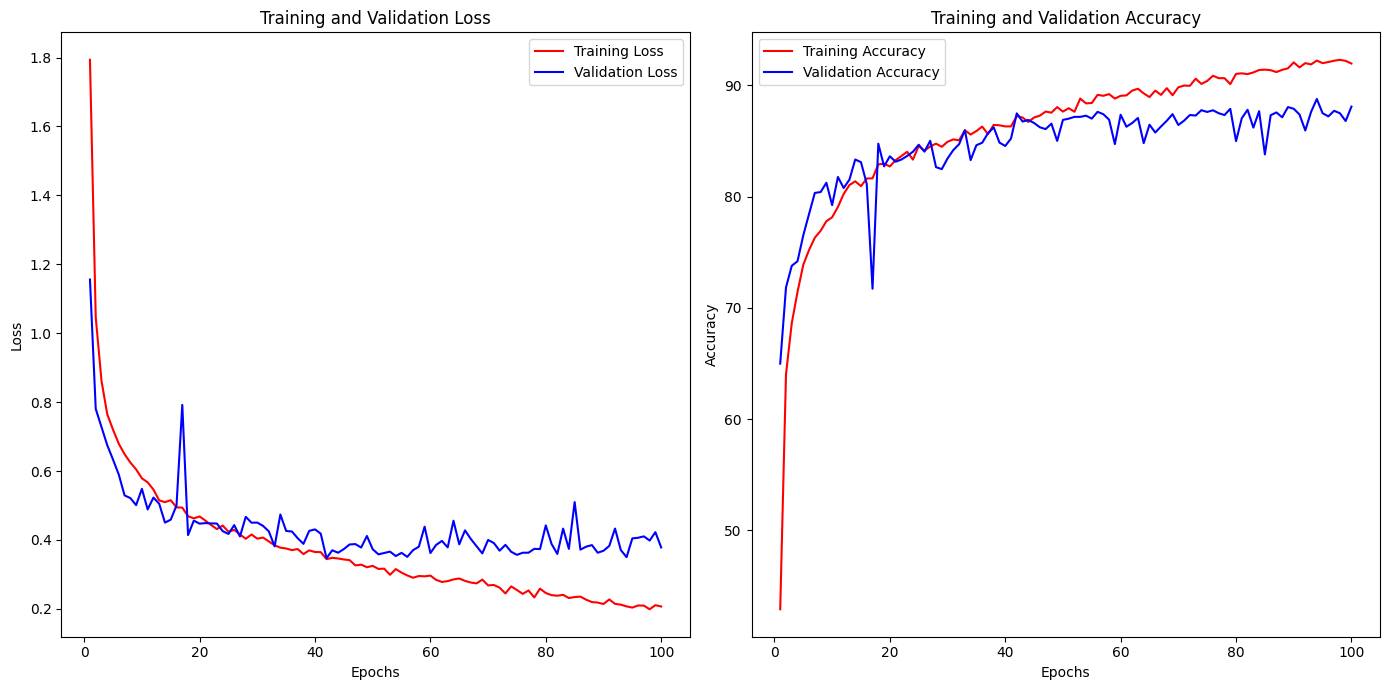

In [ ]:
classifier_trainer.plot_training_history()

------------------------------------
------------------------------------

# **Test Performance**

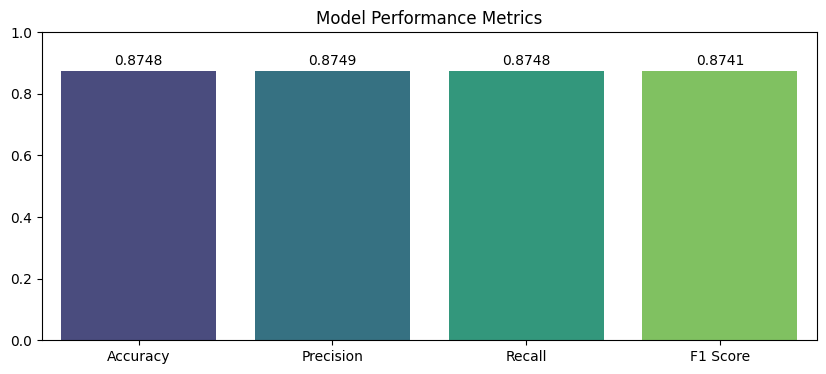

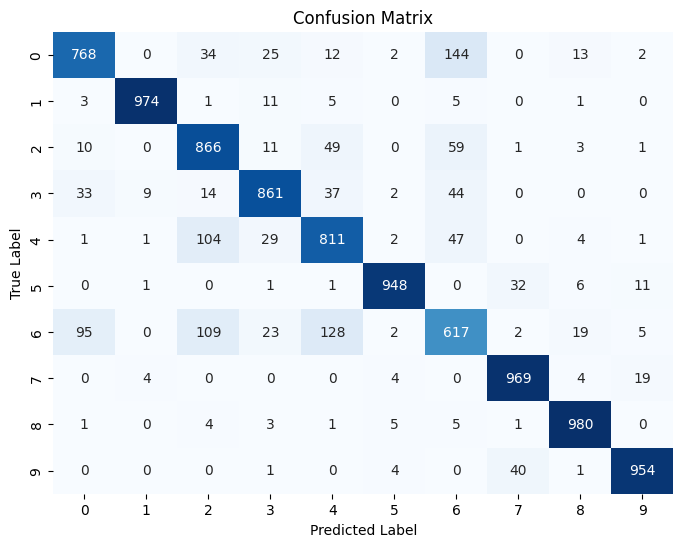

In [ ]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    test_loader = DataLoader(test, batch_size=100, shuffle=True)
    classifier_trainer.testing_and_plotting(test_loader)